###**Library Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**Data Preprocessing**

The Iris dataset consists of 150 samples from three different species of Iris flowers: Setosa, Versicolor, and Virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width. The dataset is commonly used for classification tasks to predict the species of a flower based on its features.

In [2]:
#Define the Iris dataset - includes features and labels.
iris_data = np.array([
    [5.1, 3.5, 1.4, 0.2, 0],  #Setosa
    [4.9, 3.0, 1.4, 0.2, 0],
    [4.7, 3.2, 1.3, 0.2, 0],
    [4.6, 3.1, 1.5, 0.2, 0],
    [5.0, 3.6, 1.4, 0.2, 0],
    [7.0, 3.2, 4.7, 1.4, 1],  #Versicolor
    [6.4, 3.2, 4.5, 1.5, 1],
    [6.9, 3.1, 4.9, 1.5, 1],
    [5.5, 2.3, 4.0, 1.3, 1],
    [6.5, 2.8, 4.6, 1.5, 1],
    [6.3, 3.3, 6.0, 2.5, 2],  #Virginica
    [5.8, 2.7, 5.1, 1.9, 2],
    [7.1, 3.0, 5.9, 2.1, 2],
    [6.3, 2.9, 5.6, 1.8, 2],
    [6.5, 3.0, 5.8, 2.2, 2],
])

#Split features and labels
X = iris_data[:, :4]  # Features
y = iris_data[:, 4]  # Labels

#Normalize features (Min-Max Scaling)
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X = (X - X_min) / (X_max - X_min)


#**Neural Network Class**

The model is initialized by randomly setting the weights and biases for the layers. It uses **ReLU  (Rectified Linear Unit)** in the hidden layer to introduce non-linearity and **Softmax** in the output layer to convert raw scores into probabilities for classification tasks. During **forward propagation**, the input is passed through the network to compute the output, while** backward propagation **adjusts the weights and biases by computing the gradients of the loss with respect to the network parameters. The model is trained for 1000 epochs, with the weights and biases updated based on the categorical cross-entropy loss function.

In [3]:
#Neural Network Class
class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate):
        self.W1 = np.random.randn(input_neurons, hidden_neurons)
        self.b1 = np.zeros((1, hidden_neurons))
        self.W2 = np.random.randn(hidden_neurons, output_neurons)
        self.b2 = np.zeros((1, output_neurons))
        self.learning_rate = learning_rate

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))  #Avoid numerical instability
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.W1) + self.b1
        self.hidden_output = self.relu(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.W2) + self.b2
        self.output = self.softmax(self.output_input)
        return self.output

    def backward(self, X, y_true):
        #Calculating error (integer labels directly for categorical cross-entropy)
        output_error = self.output.copy()
        output_error[np.arange(len(y_true)), y_true.astype(int)] -= 1  #Subtract 1 from correct class
        output_error /= X.shape[0]  #Normalize by batch size

        hidden_error = np.dot(output_error, self.W2.T) * self.relu_derivative(self.hidden_input)

        #Gradient updates
        self.W2 -= self.learning_rate * np.dot(self.hidden_output.T, output_error)
        self.b2 -= self.learning_rate * np.sum(output_error, axis=0, keepdims=True)
        self.W1 -= self.learning_rate * np.dot(X.T, hidden_error)
        self.b1 -= self.learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

    def train(self, X, y_true, epochs):
        loss_history = []
        for epoch in range(epochs):
            #Forward pass
            self.forward(X)
            #Compute loss (categorical cross-entropy)
            loss = -np.sum(np.log(self.output[np.arange(len(y_true)), y_true.astype(int)] + 1e-8)) / X.shape[0]
            loss_history.append(loss)
            #Backward pass
            self.backward(X, y_true)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return loss_history

#**Model Initialization and Training**

Epoch 0, Loss: 1.8252
Epoch 100, Loss: 0.9188
Epoch 200, Loss: 0.8069
Epoch 300, Loss: 0.7290
Epoch 400, Loss: 0.6649
Epoch 500, Loss: 0.6131
Epoch 600, Loss: 0.5725
Epoch 700, Loss: 0.5411
Epoch 800, Loss: 0.5166
Epoch 900, Loss: 0.4972


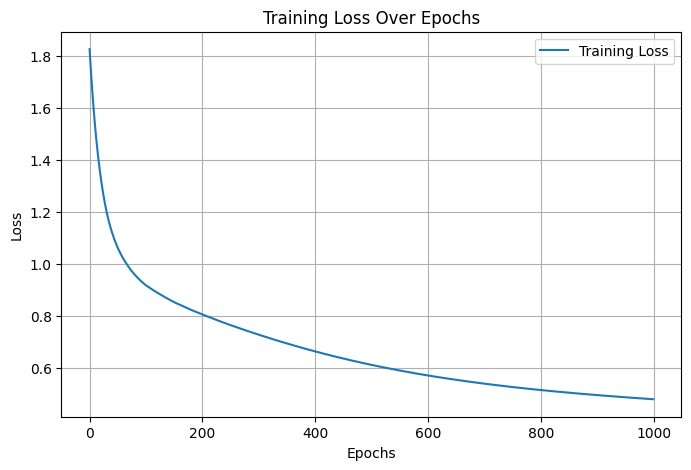

In [4]:
#Initialize neural network
nn = NeuralNetwork(input_neurons=4, hidden_neurons=6, output_neurons=3, learning_rate=0.01)

#Train the model
loss_history = nn.train(X, y, epochs=1000)

#Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


#**Predictions and Evaluation**

In [5]:
predictions = nn.forward(X)
predicted_classes = np.argmax(predictions, axis=1)

print("True labels:", y)
print("Predicted labels:", predicted_classes)

True labels: [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.]
Predicted labels: [0 0 0 0 0 2 1 2 1 2 2 2 2 2 2]
